<p align="center">
  <img src="image\indicium.jpg" width="780" height="110" />
</p>

### **Desafio - Cientista de Dados [Lighthouse]**

##### Dicionário dos Dados

|Id|Colunas|Descrição|
|:--|:--|:--|
|01|Series_Title|Nome do filme| 
|02|Released_Year|Ano de lançamento|  
|03|Certificate|Classificação etária| 
|04|Runtime|Tempo de duração|   
|05|Genre|Gênero|
|06|IMDB_Rating|Nota do IMDB|
|07|Overview|Overview do filme|
|08|Meta_score|Média ponderada de todas as críticas|
|09|Director|Diretor|
|10|Star1|Ator/atriz #1|
|11|Star2|Ator/atriz #2|
|12|Star3|Ator/atriz #3|
|13|Star4|Ator/atriz #|
|14|No_of_Votes|Número de votos|
|15|Gross|Faturamento|


##### **Carregando as bibliotecas necessárias**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import re
import os
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib


##### **Carregando a base de dados**

In [2]:
df_imdb = pd.read_csv("data\desafio_indicium_imdb.csv",index_col=0)

In [3]:
# escolhendo aleatoriamente 2 linhas da base de dados
df_imdb.sample(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
11,Forrest Gump,1994,UA,142 min,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the e...",82.0,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,"330,252,182"
226,Harry Potter and the Deathly Hallows: Part 2,2011,UA,130 min,"Adventure, Drama, Fantasy",8.1,"Harry, Ron, and Hermione search for Voldemort'...",85.0,David Yates,Daniel Radcliffe,Emma Watson,Rupert Grint,Michael Gambon,764493,"381,011,219"


##### **Conhecendo a base de dados**

In [4]:
print(colored("     Dimensão da Base de Dados        ", 'blue', attrs=['bold', 'underline']))
# linhas e colunas
num_lines_imdb, num_columns_imdb = df_imdb.shape
print("Número de linhas:", num_lines_imdb)
print("Número de colunas:", num_columns_imdb)

     Dimensão da Base de Dados        
Número de linhas: 999
Número de colunas: 15


In [5]:
# informações básicas sobre a base de dados
print(colored("     Informações da Base de Dados   ", 'blue', attrs=['bold', 'underline']))
info_df_imdb = df_imdb.info()
print(colored(info_df_imdb, attrs=['bold']))

     Informações da Base de Dados   
<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB
None


In [6]:
# estatísticas descritivas para todos os tipos de dados
print(colored("                                                  Descrição Descritiva da Base de Dados                                                        ", 'blue', attrs=['bold', 'underline']))
describe_df_imdb = df_imdb.describe(include='all')
describe_df_imdb

                                                  Descrição Descritiva da Base de Dados                                                        


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,999,999,898,999,999,999.000000,999,842.000000,999,999,999,999,999,9.990000e+02,830
unique,998,100,16,140,202,NaN,999,NaN,548,659,840,890,938,NaN,822
top,Drishyam,2014,U,130 min,Drama,NaN,An organized crime dynasty's aging patriarch t...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,2,32,234,23,84,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,7.947948,NaN,77.969121,NaN,NaN,NaN,NaN,NaN,2.716214e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,0.272290,NaN,12.383257,NaN,NaN,NaN,NaN,NaN,3.209126e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.547150e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.383560e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.731675e+05,NaN


In [7]:
# valores ausentes e porcentagem (decrescente)
missing_values = df_imdb.isna().sum()
percent_missing = (missing_values / len(df_imdb)) * 100
missing_data = pd.DataFrame({
    'Valores Ausentes': missing_values,
    'Porcentagem de Valores Ausentes': percent_missing
})
missing_data = missing_data.sort_values(by='Valores Ausentes', ascending=False)
missing_data['Porcentagem de Valores Ausentes'] = missing_data['Porcentagem de Valores Ausentes'].apply('{:.2f}%'.format)
missing_data

,Valores Ausentes,Porcentagem de Valores Ausentes
Gross,169,16.92%
Meta_score,157,15.72%
Certificate,101,10.11%
Series_Title,0,0.00%
Released_Year,0,0.00%
Runtime,0,0.00%
Genre,0,0.00%
IMDB_Rating,0,0.00%
Overview,0,0.00%
Director,0,0.00%


In [8]:
# não há duplicação.
df_imdb[df_imdb.duplicated()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


##### **Informações extraídas até aqui:**

- **A base de dados possui as seguintes características principais:**
  - Doze colunas do tipo objeto, duas float e uma int.
  - As colunas "Gross", "Meta_score" e "Certificate" possuem valores ausentes.
  - A coluna "Gross" contém valores em formato de texto (por exemplo, "10,725,228"), em vez de números não formatados. Será necessário ajustá-la para facilitar análises financeiras precisas.
  - A coluna "Meta_score" tem a primeira letra minúscula após o underline, diferente das demais.
  - Não há valores duplicados na base de dados.


- **Estatísticas e insights:**
  - O diretor Alfred Hitchcock é o mais representado, com 14 filmes na base de dados.
  - O gênero "Drama" é predominante, aparecendo em 84 filmes.
  - A mediana do número de votos por filme é de 138,560, sugerindo uma distribuição inclinada para valores mais altos.
  - Em 2014, houve o maior número de lançamentos de filmes na base de dados, totalizando 32 filmes.
  - A média da nota do IMDb é de aproximadamente 7.95, com um desvio padrão de 0.27, indicando uma variação moderada nas classificações.
  - A coluna 'Certificate' revela 16 valores únicos, indicando diferentes classificações etárias dos filmes.
  - O tempo de duração dos filmes varia de 28 a 234 minutos, com uma mediana de 130 minutos, sugerindo que a maioria dos filmes são longa-metragens.
  - Apesar de 169 valores ausentes na coluna de faturamento (Gross), os dados disponíveis mostram uma ampla variação nos ganhos financeiros, com um mínimo de $25,088 e um máximo de $2,303,232.
 


#### **Pré-processamento, transformação e análise exploratória da base de dados**

#####  1- Análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas.

**Padronização das colunas**

In [9]:
# renomeando as colunas e padronizando. tudo minúsculo
df_imdb = df_imdb.rename(columns=str.lower)
df_imdb.head(1)

,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


**Análise dos anos**

In [10]:
# analisando os anos únicos da base de dados
df_imdb['released_year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [11]:
# filmes onde o ano de lançamento é 'PG'
non_numeric_movies = df_imdb[df_imdb['released_year'] == 'PG']
non_numeric_movies

,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [12]:
# pegando o índice da primeira ocorrência do filme "Apollo 13"
index_apollo13 = df_imdb[df_imdb['series_title'] == 'Apollo 13'].index[0]
# atualizando o ano de lançamento para '1995', após pesquisar sobre o filme. 
# referência: https://pt.wikipedia.org/wiki/Apollo_13_(filme)
released_year_apollo13 = df_imdb.at[index_apollo13, 'released_year'] = '1995'
print(f'O ano de lançamento de Apollo 13 é: {released_year_apollo13}')

O ano de lançamento de Apollo 13 é: 1995


**Remoção de caracteres e conversão dos tipos das colunas**

In [13]:
# removendo 'min' e convertendo para inteiro
df_imdb["runtime"] = df_imdb["runtime"].str.replace('min', '').astype(int)
# removendo as vírgulas e convertendo para float
df_imdb['gross'] = df_imdb['gross'].str.replace(',', '').astype(float).round(3)
# convertendo para datatime
df_imdb['released_year'] = pd.to_datetime(df_imdb['released_year'], format='%Y')
df_imdb['released_year'] = df_imdb['released_year'].dt.year

**Análise dos valores ausentes e outliers**

###### Visualização dos valores ausentes

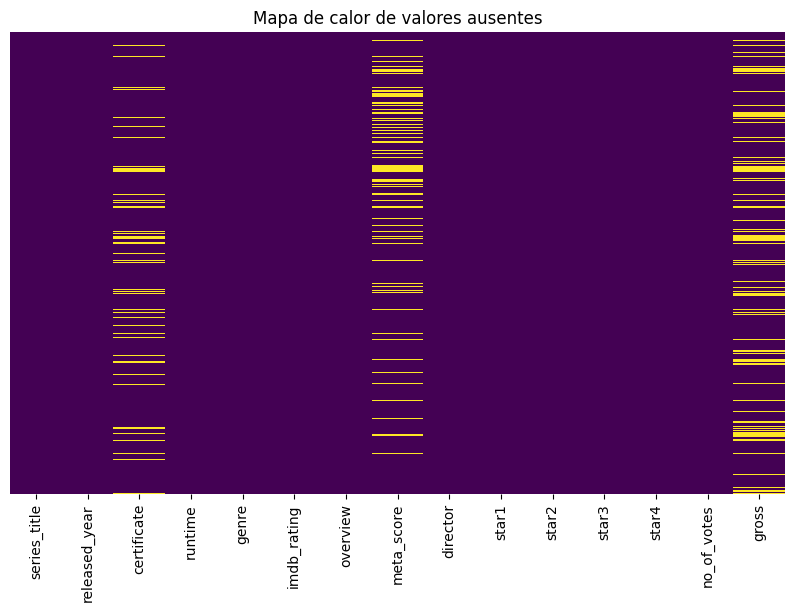

In [14]:
# mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df_imdb.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de calor de valores ausentes')
plt.show()

In [15]:
# contagem da classificação etária
certificate_counts = df_imdb['certificate'].value_counts().to_frame()
certificate_counts.columns = ['Contagem de filmes']
certificate_counts

,Contagem de filmes
certificate,
U,234
A,196
UA,175
R,146
PG-13,43
PG,37
Passed,34
G,12
Approved,11


###### Visualização da distribuição dos dados da coluna gross

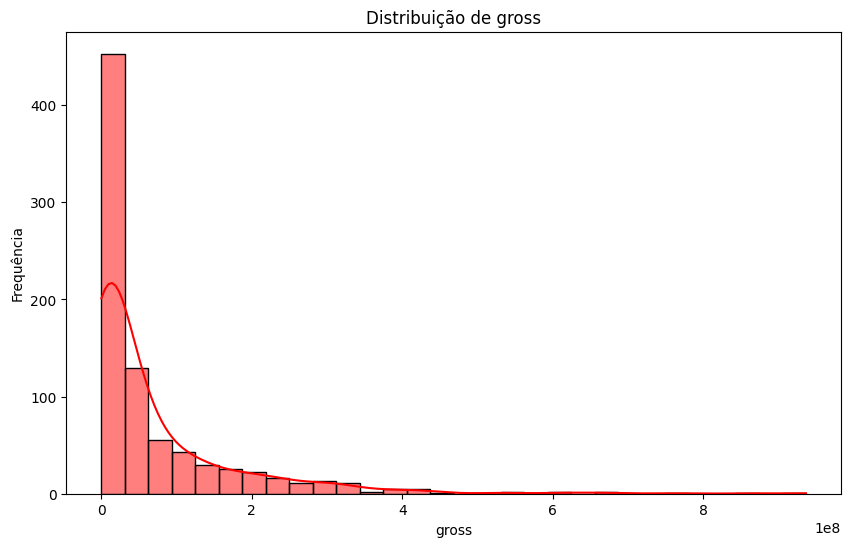

In [16]:
# histograma de gross
plt.figure(figsize=(10, 6))
sns.histplot(df_imdb['gross'].dropna(), bins=30, kde=True, color='red', edgecolor='black')
plt.xlabel('gross')
plt.ylabel('Frequência')
plt.title('Distribuição de gross')
plt.show()


###### Visualização dos outliers da coluna gross

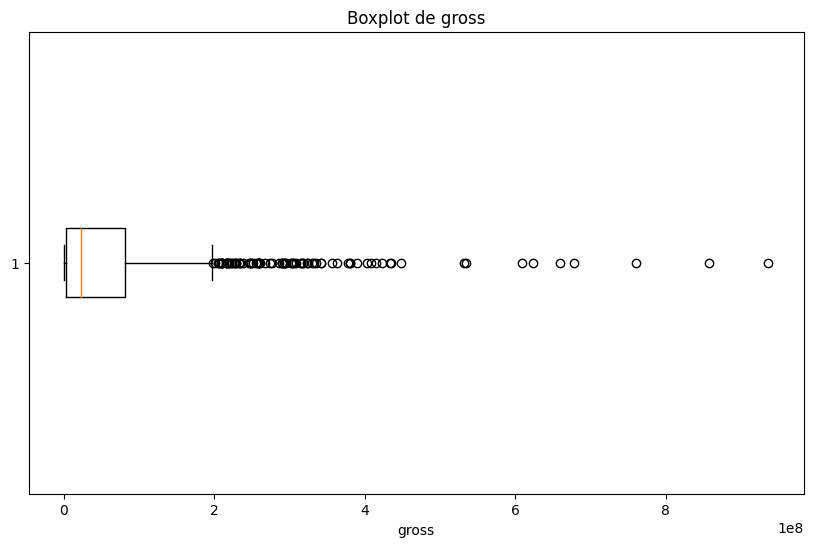

In [17]:
# boxplot para gross
plt.figure(figsize=(10, 6))
plt.boxplot(df_imdb['gross'].dropna(), vert=False)
plt.title('Boxplot de gross')
plt.xlabel('gross')
plt.show()


###### Visualização da distribuição dos dados da coluna meta_score

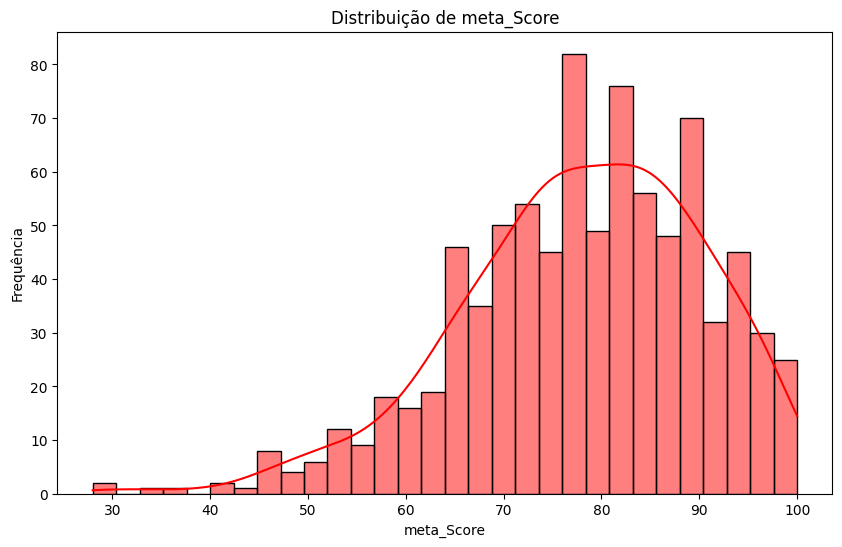

In [18]:
# histograma de meta_score 
plt.figure(figsize=(10, 6))
sns.histplot(df_imdb['meta_score'].dropna(), bins=30, kde=True, color='red', edgecolor='black')
plt.xlabel('meta_Score')
plt.ylabel('Frequência')
plt.title('Distribuição de meta_Score')
plt.show()

###### Visualização dos outliers da coluna meta_score

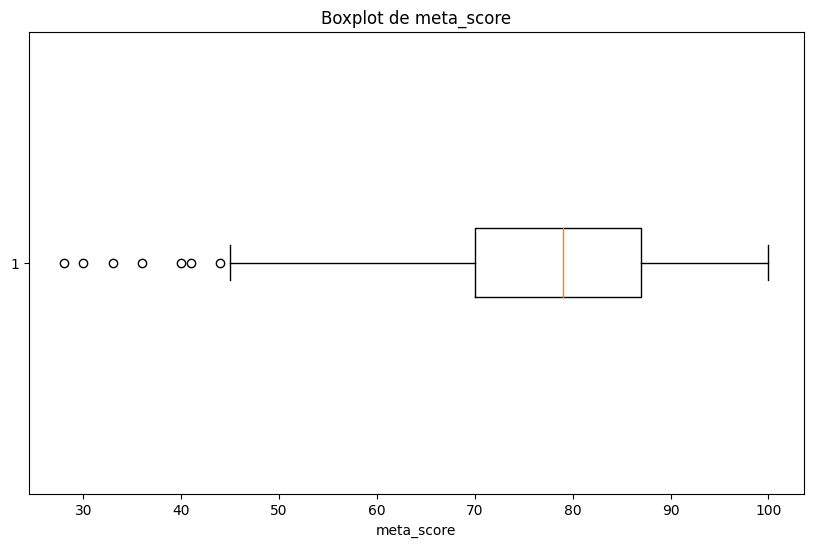

In [19]:
# bloxpot meta_score
plt.figure(figsize=(10, 6))
plt.boxplot(df_imdb['meta_score'].dropna(), vert=False)
plt.title('Boxplot de meta_score')
plt.xlabel('meta_score')
plt.show()

*É amplamente recomendado na literatura que a imputação seja preferida à exclusão de dados, especialmente quando os valores ausentes representam mais de 5% da amostra. A exclusão pode resultar em perda significativa de informações e viés nos resultados da análise. Portanto, segui as estratégias abaixo mencionadas:*

*Para variáveis categóricas como 'certificate', a imputação com a moda é preferível, garantindo que os valores imputados reflitam a tendência geral da base de dados. Segundo Hair et al. (2010), imputar valores ausentes com a moda é uma prática comum e eficaz em variáveis categóricas, preservando a distribuição de frequências observadas na amostra.*

*Para a coluna 'gross', devido à distribuição assimétrica e à presença de outliers significativos, optei pela imputação com a mediana. Conforme discutido por Ribeiro (2022), em distribuições assimétricas com outliers, a mediana minimiza o impacto desses valores extremos nos dados imputados.*

*Quanto à coluna 'meta_score', que apresenta uma distribuição relativamente simétrica e ausência de outliers extremos, escolhi a imputação com a média. A média é a medida central apropriada para distribuições simétricas, proporcionando uma estimativa razoável para os valores ausentes, conforme Hair et al. (2010).*

*Referências:*

*- https://www.drnishikantjha.com/papersCollection/Multivariate%20Data%20Analysis.pdf*

*- https://repositorio.ufscar.br/bitstream/handle/ufscar/17030/Tese_Tais_Roberta_Ribeiro_versao_final.pdf?sequence=1&isAllowed=y*




###### Imputação dos NaN´s

In [20]:
# imputação dos valores ausentes
mean_meta_score = df_imdb['meta_score'].mean()
mode_certificate = df_imdb['certificate'].mode()[0]
median_gross = df_imdb['gross'].median()
df_imdb['gross'].fillna(median_gross, inplace=True)
df_imdb['meta_score'].fillna(mean_meta_score, inplace=True)
df_imdb['certificate'].fillna(mode_certificate, inplace=True)

###### Renomeação das siglas de certificate

In [21]:
# variam significativamente por conta do país e da região de lançamento dos filmes
df_imdb['certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', 'PG', 'G', 'Passed', 'TV-14', '16',
       'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'], dtype=object)

In [22]:
# mapeamento das siglas para os nomes completos e países correspondentes
map_certificates = {
    'A': 'Todos (Índia)',
    'UA': 'Universal, menores (Índia)',
    'U': 'Universal (Reino Unido)',
    'PG-13': '13- (EUA)',
    'R': 'Restrito (<17) (EUA)',
    'PG': '7+ (EUA)',
    'G': 'Livre (EUA)',
    'Passed': 'Aprovado (EUA)',
    'TV-14': '14+ (EUA)',
    '16': '16+ (Vários países)',
    'TV-MA': 'Adultos (EUA)',
    'Unrated': 'Não class. (Internacional)',
    'GP': '13- (EUA)',
    'Approved': 'Aprov. (até 1968, EUA)',
    'TV-PG': 'Crianças c/ supervisão (EUA)',
    'U/A': 'Universal, menores (Índia)'
}

# renomeando as siglas de 'certificate'
df_imdb['certificate'] = df_imdb['certificate'].replace(map_certificates)


*Referência:*

*- https://www.primevideo.com/-/pt/help/ref=atv_hp_nd_nav?nodeId=GFGQU3WYEG6FSJFJ*

###### Visualização dos outliers das colunas numéricas

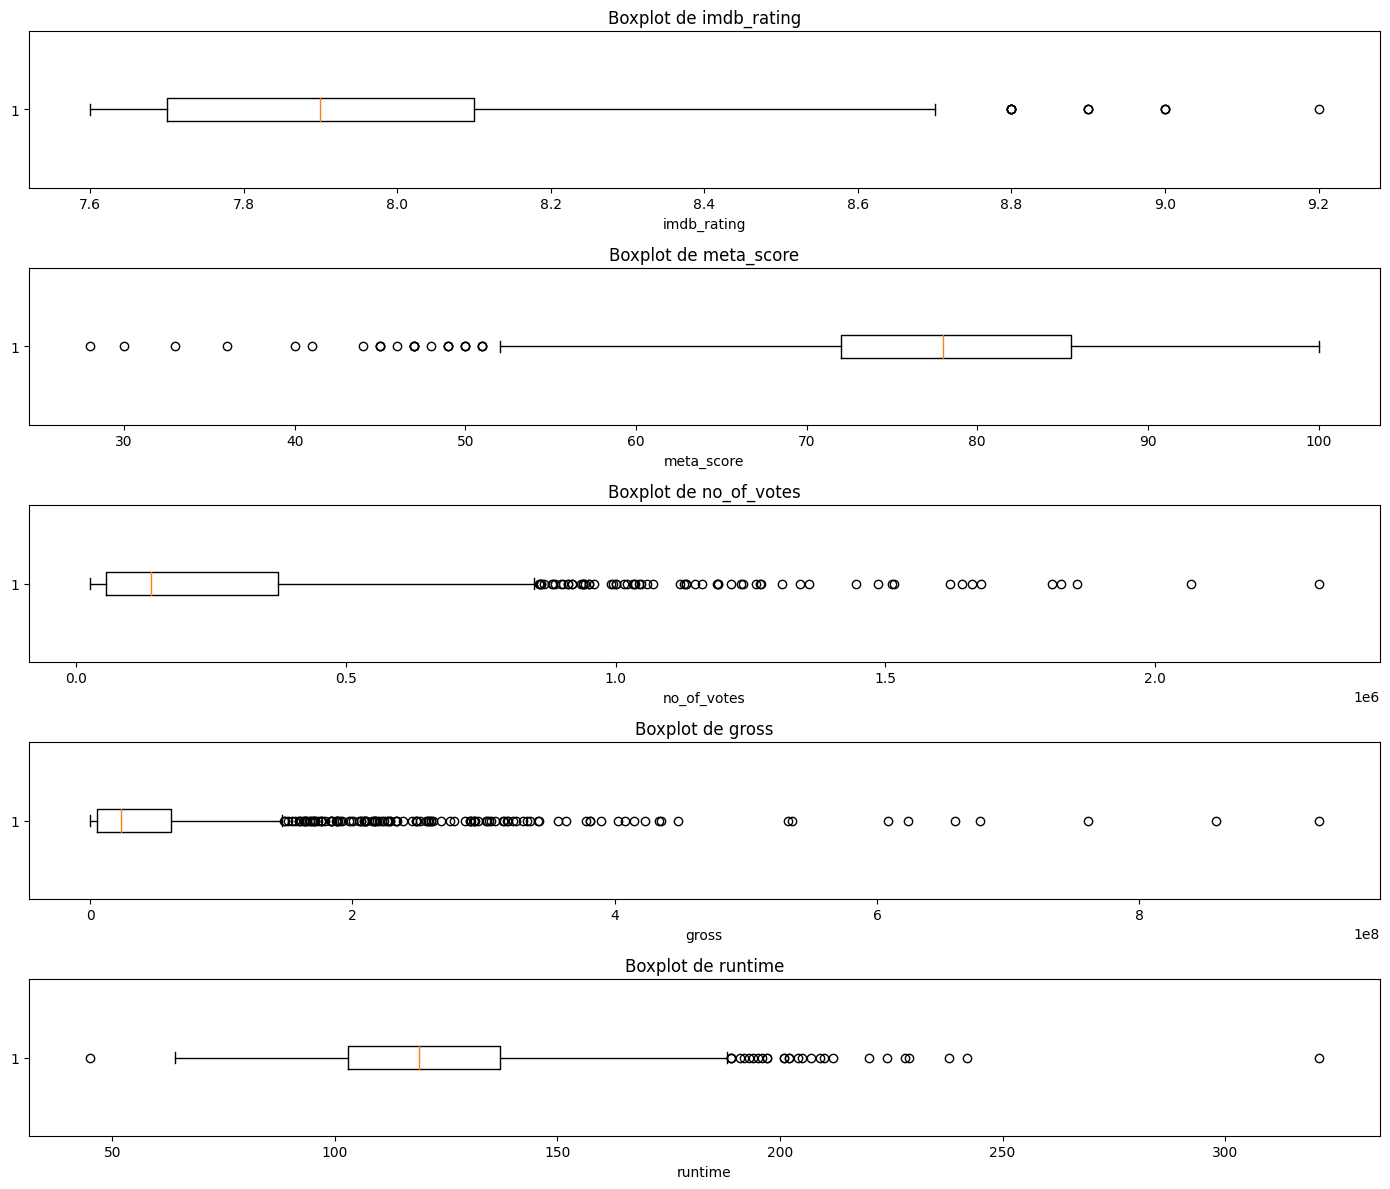

In [23]:
# boxplots para colunas númericas
plt.figure(figsize=(14, 12))


plt.subplot(5, 1, 1)
plt.boxplot(df_imdb['imdb_rating'], vert=False)
plt.title('Boxplot de imdb_rating')
plt.xlabel('imdb_rating')


plt.subplot(5, 1, 2)
plt.boxplot(df_imdb['meta_score'], vert=False)
plt.title('Boxplot de meta_score')
plt.xlabel('meta_score')


plt.subplot(5, 1, 3)
plt.boxplot(df_imdb['no_of_votes'], vert=False)
plt.title('Boxplot de no_of_votes')
plt.xlabel('no_of_votes')


plt.subplot(5, 1, 4)
plt.boxplot(df_imdb['gross'], vert=False)
plt.title('Boxplot de gross')
plt.xlabel('gross')


plt.subplot(5, 1, 5)
plt.boxplot(df_imdb['runtime'], vert=False)
plt.title('Boxplot de runtime')
plt.xlabel('runtime')

plt.tight_layout()
plt.show()


A análise dos boxplots revela a presença de filmes com notas altas no IMDb, médias ponderadas de críticas mais baixas, números significativos de votos, faturamentos elevados e durações atípicas. Optei por manter esses "outliers" para capturar a diversidade da indústria cinematográfica. Essa decisão busca preservar insights e garantir uma análise abrangente e representativa dos dados, alinhando-se com as melhores práticas para evitar exclusões arbitrárias e manter a integridade da análise exploratória.

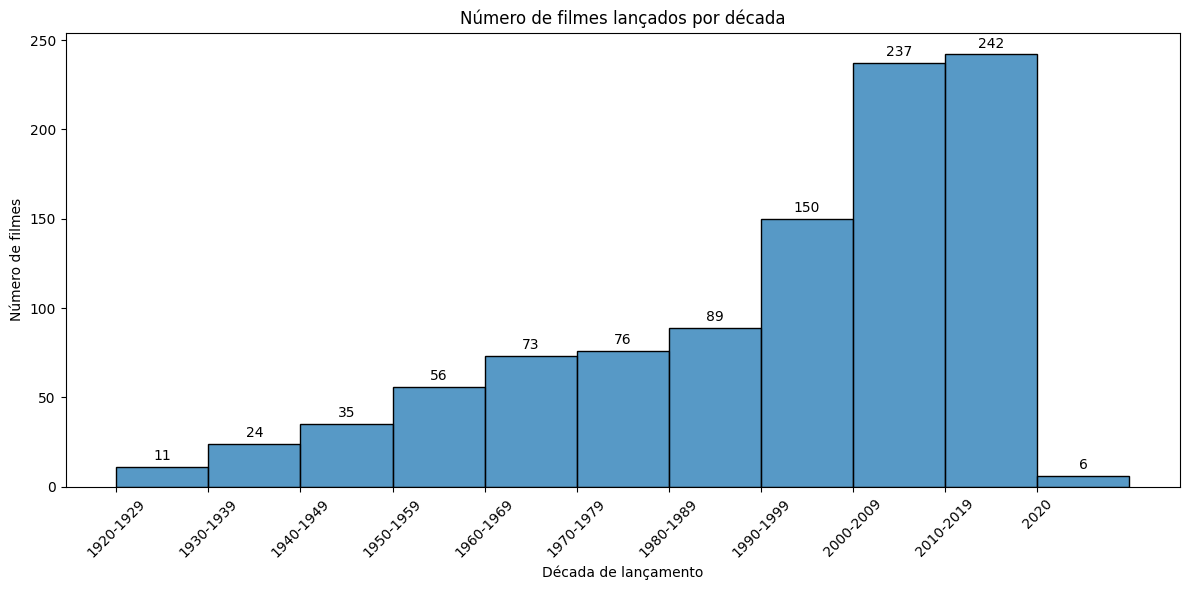

In [24]:
# mostrar até 2020
bins = np.arange(1920, 2031, 10) 
plt.figure(figsize=(12, 6))
# histograma
ax = sns.histplot(df_imdb['released_year'], bins=bins, kde=False)
# valores nas barras
for i, p in enumerate(ax.patches):
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# mostra décadas específicas
decade_labels = [f'{bins[i]}-{bins[i]+9}' if bins[i] != 2020 else '2020' for i in range(len(bins)-1)]
plt.xticks(ticks=bins[:-1], labels=decade_labels, rotation=45)
plt.title('Número de filmes lançados por década')
plt.xlabel('Década de lançamento')
plt.ylabel('Número de filmes')
plt.tight_layout()
plt.show()


**- Crescimento contínuo da indústria cinematográfica**

*Como observado no gráfico acima, podemos inferir que há um crescimento constante no número de filmes lançados por década.*

**- Plataformas de streaming**

*A partir dos anos 2000, coincidindo com o crescimento das plataformas de streaming, como Netflix, Amazon Prime Video e outros serviços digitais, observamos um aumento acentuado na quantidade de filmes lançados.*

**- Pandemia de COVID-19**

*Com o impacto global da pandemia de COVID-19, muitas produções cinematográficas foram afetadas por fechamentos de estúdios, interrupções na produção e adiamentos de lançamentos. Como podemos ver no gráfico acima, ano de 2020 apresenta um número significativamente menor de lançamentos.*

**- Diversificação de gêneros e distribuição global:**

*Com o aumento da produção de filmes nas décadas mais recentes, é plausível inferir que a globalização da indústria cinematográfica permitiu que filmes independentes e de nicho alcançassem públicos mais amplos em diferentes partes do mundo..*

*Fontes que corroboram as hipóteses levantadas:*

*- https://www.aicinema.com.br/mudancas-na-industria-cinematografica/*

*- https://teletime.com.br/27/08/2020/os-impactos-da-pandemia-na-industria-do-entretenimento/*

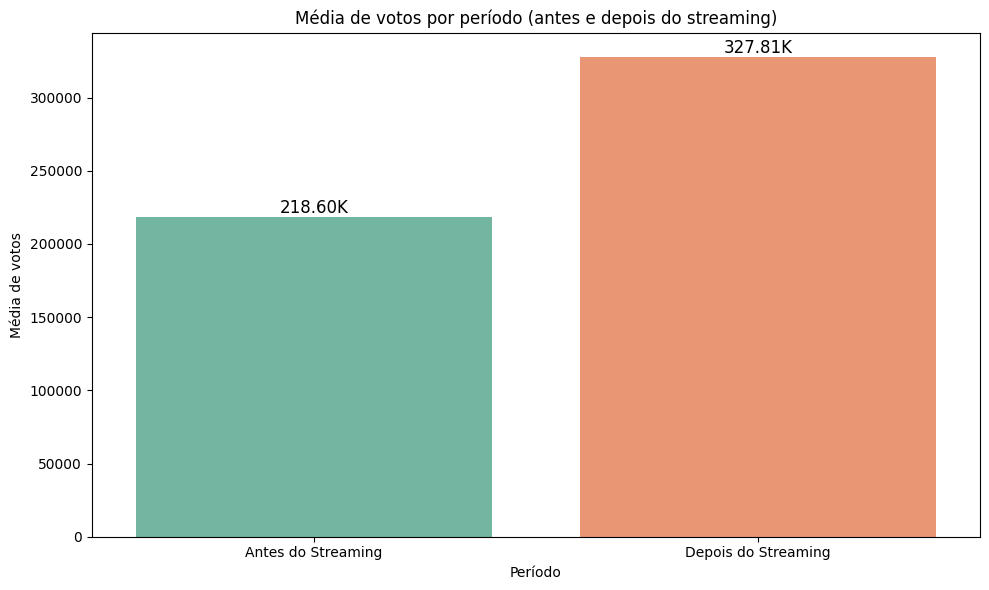

In [25]:
# cópia dos dados originais para manipulação
df_copy = df_imdb.copy()
df_copy['period'] = df_copy['released_year'].apply(lambda year: 'Antes do Streaming' if year < 2000 else 'Depois do Streaming')
# média de votos por período
mean_votes_by_period = df_copy.groupby('period')['no_of_votes'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='period', y='no_of_votes', data=mean_votes_by_period, palette='Set2')
# médias nas barras de forma automática
for p in ax.patches:
    ax.annotate(f'{p.get_height()/1000:.2f}K', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', color='black', fontsize=12)
plt.xlabel('Período')
plt.ylabel('Média de votos')
plt.title('Média de votos por período (antes e depois do streaming)')
plt.tight_layout()
plt.show()

**- A acessibilidade e a disponibilidade contínua de filmes por meio do streaming aumentou a interação do público, resultando em mais votos.**

*Como podemos observar no gráfico acima, a média de votos por filme aumentou de forma relevante após as streaming. Isso pode indicar uma maior interatividade do público com as produções cinematográficas, possivelmente devido à facilidade de acesso e variedade de conteúdo oferecidos por plataformas como Netflix, Amazon Prime Video, Disney+ entre outras.*

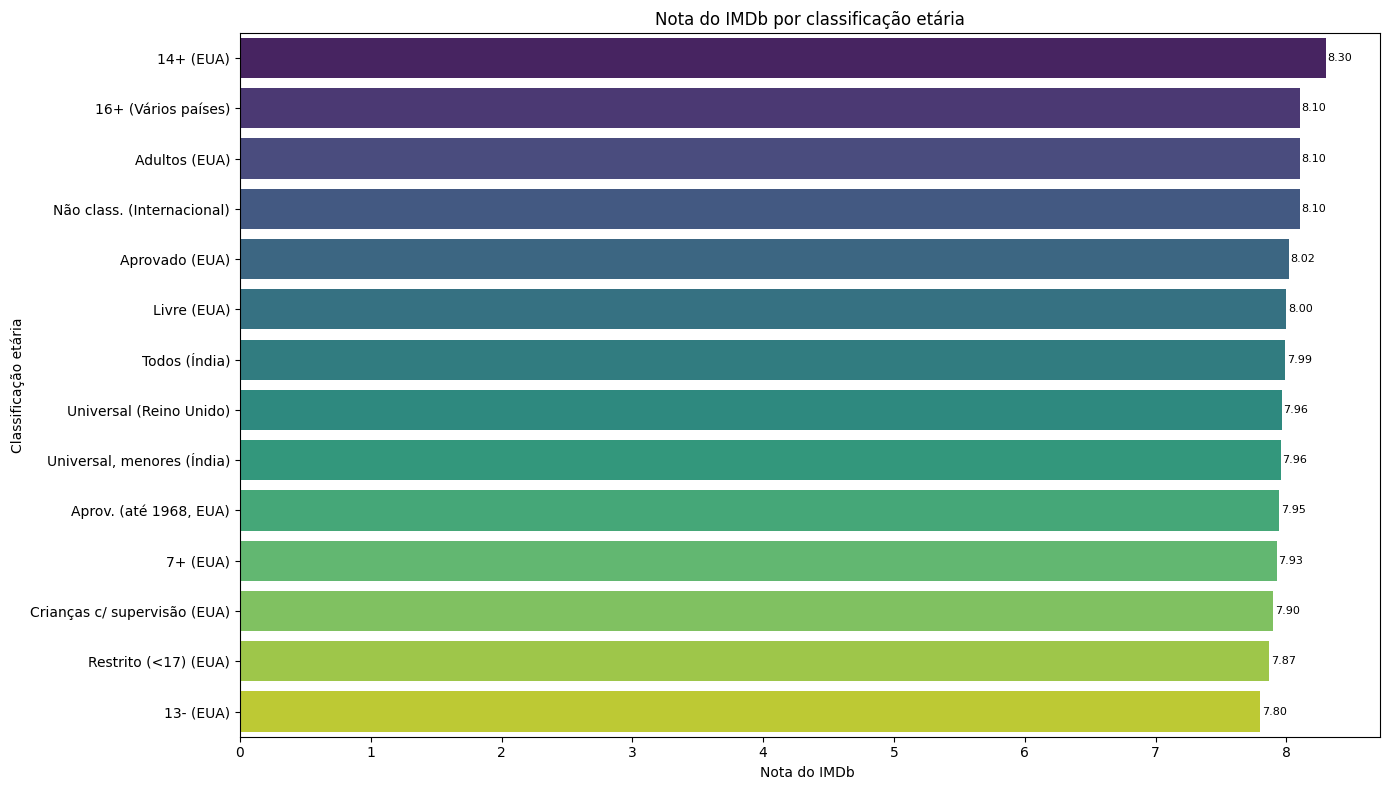

In [26]:
# média de notas do IMDb para cada tipo de classificação etária
rating_by_certificate = df_imdb.groupby('certificate')['imdb_rating'].mean().sort_values(ascending=False)
# gráfico de barras horizontais com valores
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=rating_by_certificate.values, y=rating_by_certificate.index, palette='viridis')
plt.title('Nota do IMDb por classificação etária')
plt.xlabel('Nota do IMDb ')
plt.ylabel('Classificação etária')
plt.tight_layout()
#  valores nas barras
for index, value in enumerate(rating_by_certificate):
    ax.text(value + 0.01, index, f'{value:.2f}', va='center', fontsize=8)
plt.show()

**- Classificações por faixa etária e supervisão parental.**

*No gráfico acima, vemos que as classificações etárias "7+ (EUA)" e "Crianças c/ supervisão (EUA)" mostram médias de notas um pouco mais baixas. Isso pode sugerir que filmes orientados para um público mais jovem ou com requisitos de supervisão parental possam ter critérios mais rigorosos de avaliação.*

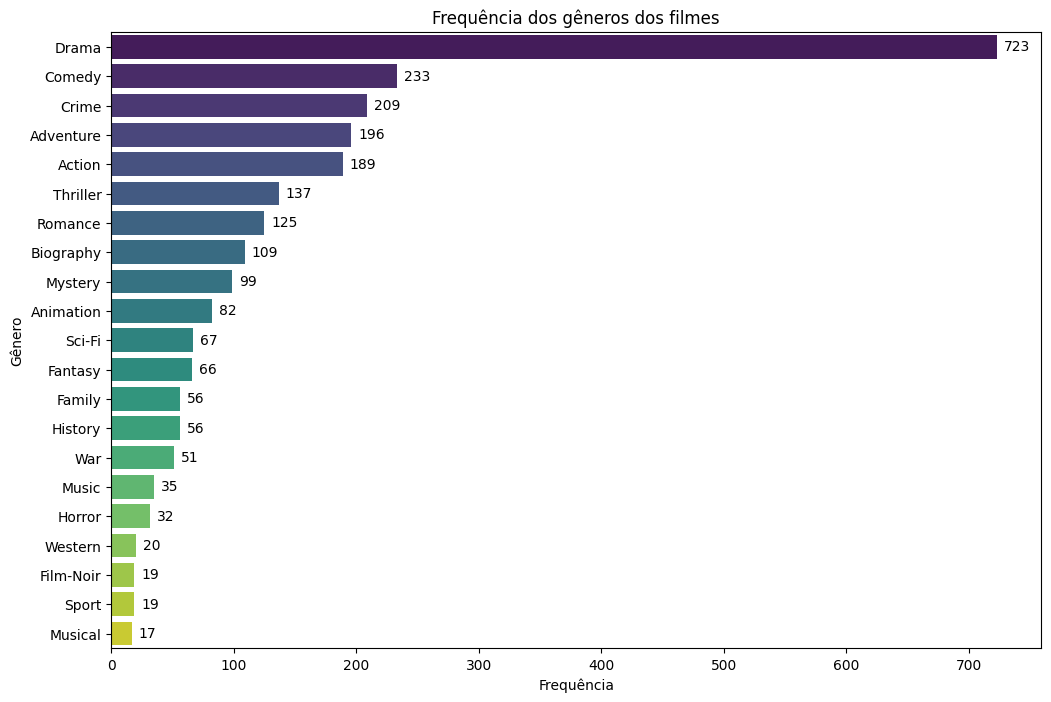

In [27]:
# função explode do pandas para contar os gêneros. "desmembra" múltiplos valores que estão agrupados em uma única célula ou entrada.
genre_counts = df_imdb['genre'].str.split(', ').explode().value_counts()
# gráfico de barras com os valores
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
# valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, color='black', 
                xytext=(5, 0), textcoords='offset points')
plt.title('Frequência dos gêneros dos filmes')
plt.xlabel('Frequência')
plt.ylabel('Gênero')
plt.show()

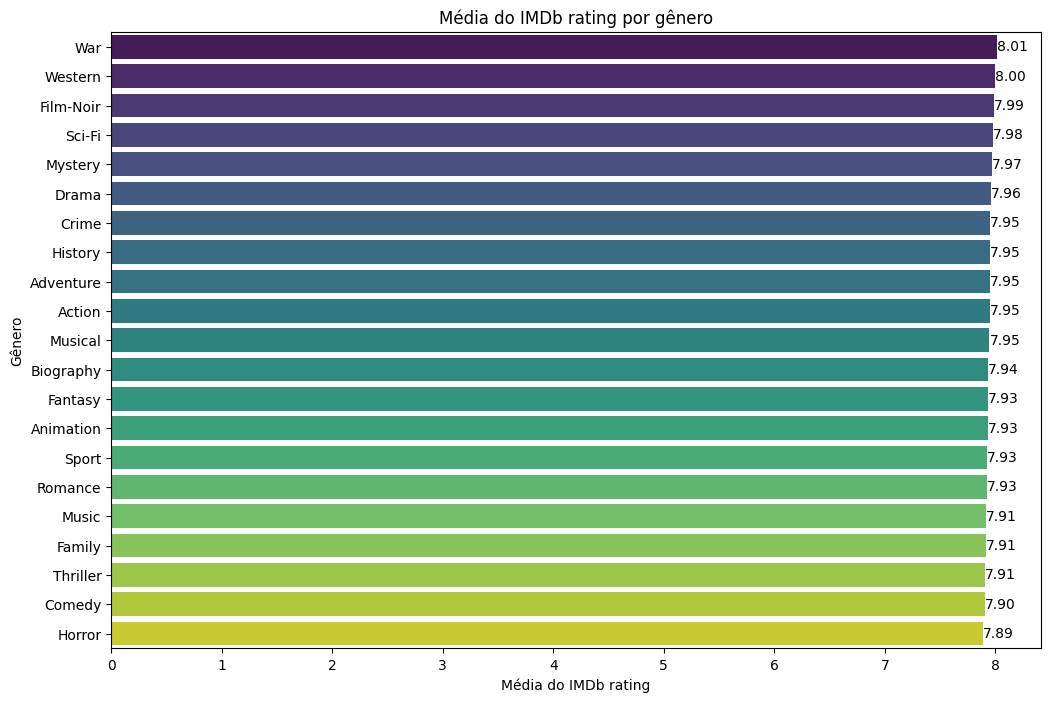

In [28]:
# combinações de gêneros em gêneros individuais usando explode
df_exploded = df_imdb.assign(genre=df_imdb['genre'].str.split(', ')).explode('genre')
# média do IMDb Rating por gênero 
mean_rating_by_genre_indiv = df_exploded.groupby('genre')['imdb_rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=mean_rating_by_genre_indiv.values, y=mean_rating_by_genre_indiv.index, palette='viridis')
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')

plt.xlabel('Média do IMDb rating')
plt.ylabel('Gênero')
plt.title('Média do IMDb rating por gênero')
plt.show()


**- Avaliação dos gêneros no IMDb rating**

*Podemos concluir analisando os gráficos acima que filmes de gêneros como guerra, western e film-noir tendem a ter avaliações mais altas na IMDb. Drama, que é o gênero mais frequente, também mantêm uma boa média. Já o gênero horror tem uma média de avaliação mais baixa.*

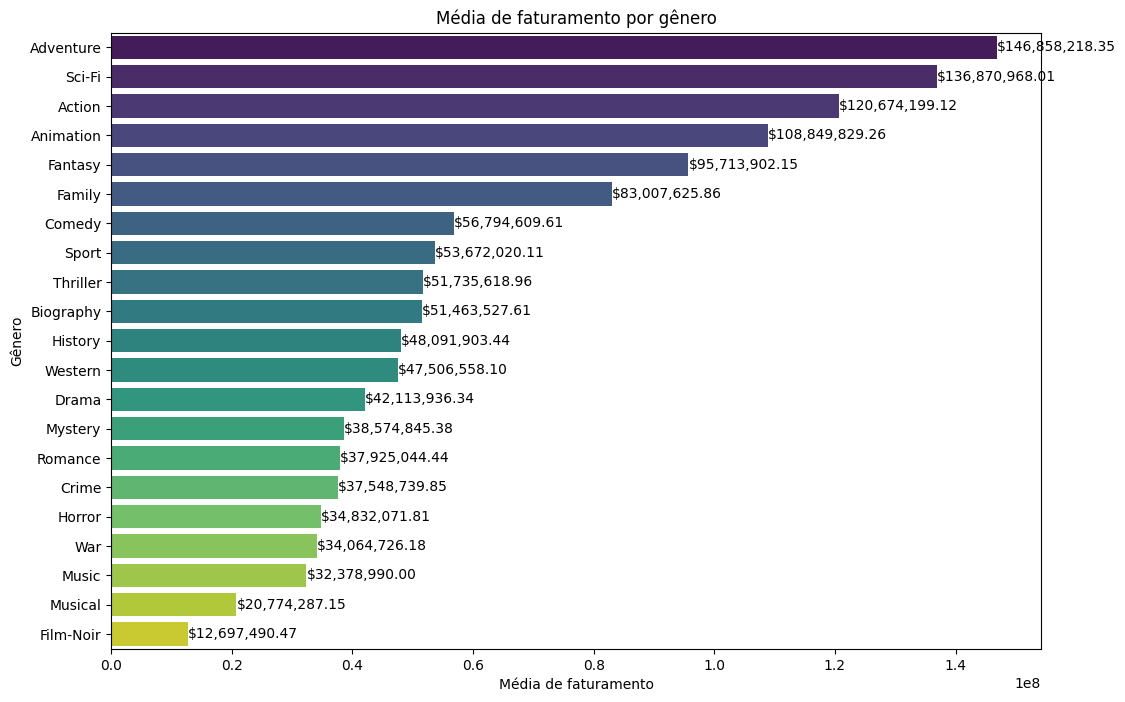

In [47]:
# média de faturamento por gênero
df_exploded = df_imdb.assign(genre=df_imdb['genre'].str.split(', ')).explode('genre')
mean_gross_by_genre_indiv = df_exploded.groupby('genre')['gross'].mean().sort_values(ascending=False)
#valores formatados como strings de moeda
mean_gross_by_genre_table = mean_gross_by_genre_indiv.reset_index()
mean_gross_by_genre_table.columns = ['Gênero', 'Média de Faturamento']
mean_gross_by_genre_table['Média de Faturamento'] = mean_gross_by_genre_table['Média de Faturamento'].apply(lambda x: f'${x:,.2f}')
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=mean_gross_by_genre_indiv.values, y=mean_gross_by_genre_indiv.index, palette='viridis')
for index, value in enumerate(mean_gross_by_genre_indiv):
    ax.text(value, index, f'${value:,.2f}', color='black', ha="left", va="center")
plt.xlabel('Média de faturamento')
plt.ylabel('Gênero')
plt.title('Média de faturamento por gênero')
plt.show()

**- Popularidade versus faturamento**

*Gêneros como Adventure, Sci-Fi e Action, apesar de alcançarem altos faturamentos médios, não ocupam as posições mais altas na média de IMDb Rating, conforme mostrado na figura 'Média do IMDb por gênero'. Isso pode sugerir que, apesar de serem populares financeiramente, esses gêneros podem enfrentar desafios críticos.*

*Por outro lado, gêneros como Drama e Romance recebem avaliações relativamente altas no IMDb, mas apresentam faturamentos mais baixos em comparação com gêneros como Adventure e Sci-Fi. Isso sugere uma possível desconexão entre a percepção de qualidade e o sucesso financeiro.*

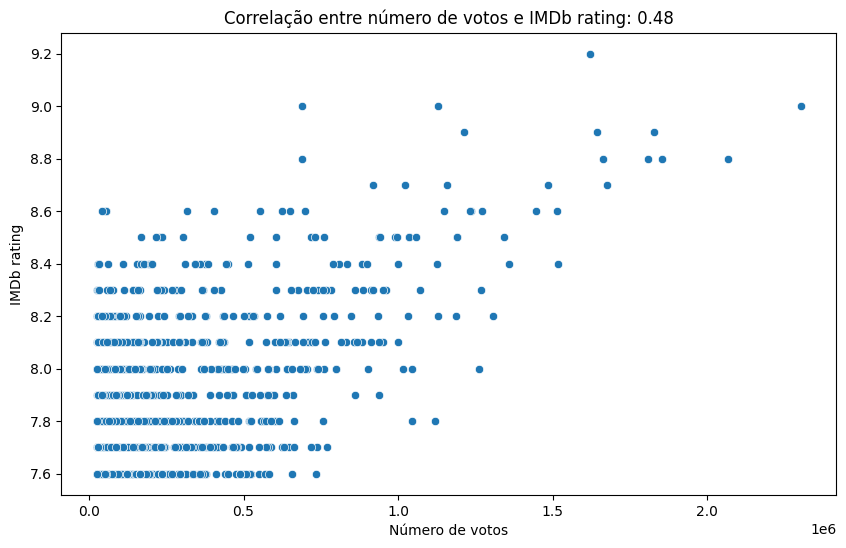

In [30]:
# correlação entre o número de votos recebidos e o IMDb Rating
correlation_votes_rating = df_imdb['no_of_votes'].corr(df_imdb['imdb_rating'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_imdb['no_of_votes'], y=df_imdb['imdb_rating'])
plt.xlabel('Número de votos')
plt.ylabel('IMDb rating')
plt.title(f'Correlação entre número de votos e IMDb rating: {correlation_votes_rating:.2f}')
plt.show()

**- Popularidade e avaliações do público**

*Como podemos observar no scatterplot acima, filmes que recebem mais votos tendem a ter uma avaliação ligeiramente melhor no IMDb. Isso pode sugerir que filmes populares - aqueles que atraem muitos votos - possivelmente são melhor avaliados. Mas a correlação é moderada, o que significa que há outros fatores além da popularidade.*

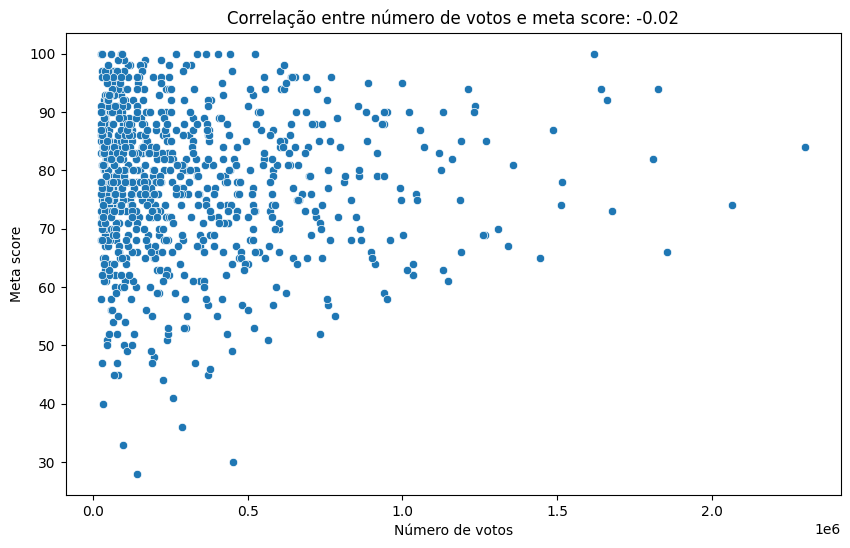

In [31]:
# correlação entre o número de votos recebidos e o meta_score
correlation_votes_meta = df_imdb['no_of_votes'].corr(df_imdb['meta_score'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_imdb['no_of_votes'], y=df_imdb['meta_score'])
plt.xlabel('Número de votos')
plt.ylabel('Meta score')
plt.title(f'Correlação entre número de votos e meta score: {correlation_votes_meta:.2f}')
plt.show()

**- Popularidade e avaliações da crítica**

*Já no gráfico acima, vemos que a popularidade de um filme não tem impacto significativo na média ponderada de todas as críticas "meta_score". A correlação de -0.02 encontrada indica uma relação praticamente inexistente.*

##### 2.	Responda também às seguintes perguntas:
##### a.	Qual filme você recomendaria para uma pessoa que você não conhece?


*É uma pergunta bem subjetiva e depende de muitos fatores, como preferências pessoais, estado de espírito, interesses em gêneros específicos, idade, etc. No entanto, vou abordar essa pergunta de forma analítica e baseada nos dados, para sugerir filmes que têm uma alta probabilidade de agradar a um público geral.*

In [32]:
# filmes com alta avaliação de IMDb rating, meta score e grande número de votos
filtered_movies = df_imdb[(df_imdb['imdb_rating'] >= 8.5) & 
                          (df_imdb['meta_score'] >= 80) & 
                          (df_imdb['no_of_votes'] >= 500000)]
recommended_movies = filtered_movies.sort_values(by=['imdb_rating', 'meta_score', 'no_of_votes'], ascending=[False, False, False])
recommended_movies[['series_title', 'imdb_rating', 'meta_score', 'no_of_votes']].head(5)


,series_title,imdb_rating,meta_score,no_of_votes
1,The Godfather,9.2,100.0,1620367
4,12 Angry Men,9.0,96.0,689845
3,The Godfather: Part II,9.0,90.0,1129952
2,The Dark Knight,9.0,84.0,2303232
6,Pulp Fiction,8.9,94.0,1826188


*Baseado nos dados, criei a tabela acima e selecionei os 5 filmes com as notas mais altas no IMDb, as melhores médias ponderadas de todas as críticas e um número significativo de votos. Portanto, com base nesses critérios, indicaria qualquer um dos 5 filmes listados, como 'The Godfather', '12 Angry Men', 'The Dark Knight', entre outros. Esses filmes não apenas receberam altas avaliações do público e crítica, mas também acumularam um grande número de votos, indicativo de grande popularidade.*

##### b.	Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 

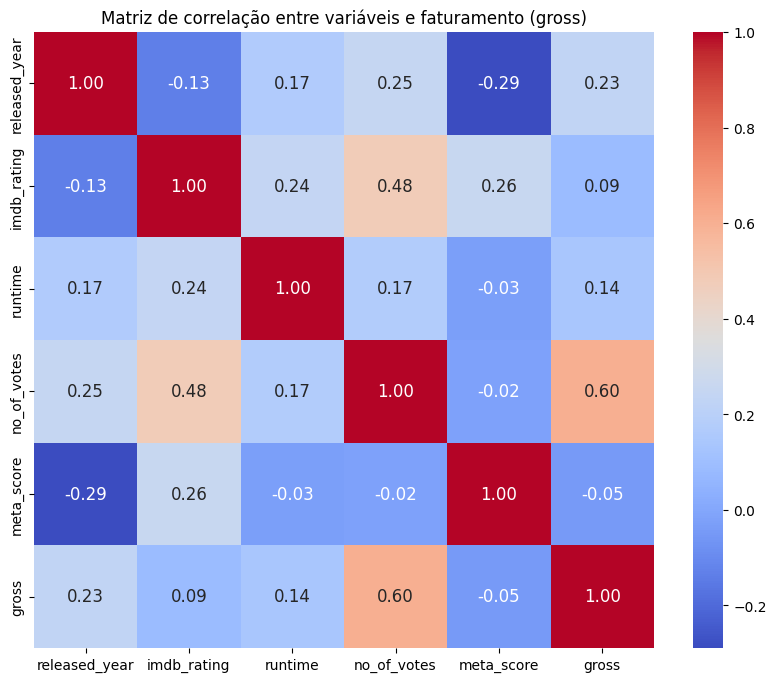

In [33]:
# colunas relevantes para a análise de correlação. matriz de correlação com 'gross' - númerica -
colune_selecte = ['released_year','imdb_rating', 'runtime', 'no_of_votes', 'meta_score']
corr = df_imdb[colune_selecte + ['gross']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Matriz de correlação entre variáveis e faturamento (gross)')
plt.show()

*A análise da matriz de correlação acima, mostra que o número de votos (no_of_votes) apresenta a maior correlação positiva com o faturamento (gross), com um valor de correlação de 0.60. Isso sugere que filmes com um maior número de votos tendem a ter um faturamento mais alto. Além disso, tem-se correlações moderadas com o ano de lançamento (released_year) e a duração do filme (runtime), indicando que lançamentos recentes e filmes mais longos também podem influenciar positivamente.*

*Para uma análise mais completa, também considerei as variáveis categóricas como diretor e elenco principal. Como consta na tabela a seguir.* 

In [34]:
# agrupando por star1, star2, star3, star4 e director e calculando a média do gross
grouped_data = df_imdb.groupby(['star1', 'star2', 'star3', 'star4', 'director', 'released_year'])['gross'].mean().reset_index()
grouped_data_sorted = grouped_data.sort_values(by='gross', ascending=False)
grouped_data_sorted.head(5)


,star1,star2,star3,star4,director,released_year,gross
221,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,J.J. Abrams,2015,936662225.0
493,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Anthony Russo,2019,858373000.0
824,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,James Cameron,2009,760507625.0
494,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Anthony Russo,2018,678815482.0
595,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,James Cameron,1997,659325379.0


*Analisei os cinco filmes mais lucrativos na base de dados, são eles: 'Star Wars: The Force Awakens' (2015), 'Avengers: Endgame' (2019), 'Avatar' (2009), 'Avengers: Infinity War' (2018) e 'Titanic' (1997). Pude observar que todos esses filmes foram dirigidos por cineastas renomados e contaram com um elenco de destaque.* 

*Logo, esses elementos combinados destacam-se como determinantes importantes na criação de uma expectativa de faturamento elevada para filmes, evidenciando a importância do envolvimento do público, timing de lançamento e qualidade do elenco e direção.*

##### c.	Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

In [35]:
pd.set_option('display.max_colwidth', None)
# analisando algumas sinopses aleatórias para entender o formato, conteúdo e gêneros
sample_movies = df_imdb.sample(5)[['series_title', 'overview']]
sample_movies

,series_title,overview
581,Under sandet,"In post-World War II Denmark, a group of young German POWs are forced to clear a beach of thousands of land mines under the watch of a Danish Sergeant who slowly learns to appreciate their plight."
561,The Lost Weekend,The desperate life of a chronic alcoholic is followed through a four-day drinking bout.
344,The Perks of Being a Wallflower,An introvert freshman is taken under the wings of two seniors who welcome him to the real world
670,Misery,"After a famous author is rescued from a car crash by a fan of his novels, he comes to realize that the care he is receiving is only the beginning of a nightmare of captivity and abuse."
181,Yôjinbô,A crafty ronin comes to a town divided by two criminal gangs and decides to play them against each other to free the town.


*Que o overview - sinopse - oferece uma visão geral sobre o enredo do filme. Isso permite que os espectadores tenham uma noção do que esperar do filme, incluindo seus temas principais, estilo narrativo e elementos de gênero. Consequentemente, a sinopse pode influenciar a decisão do público em assistir ao filme, além de ajudar na identificação dos gêneros predominantes e na compreensão do contexto e das motivações dos personagens. Particularmente, já mudei de ideia ao ler a sinopse de diversos filmes, tanto para assistir quanto para não assistir.*

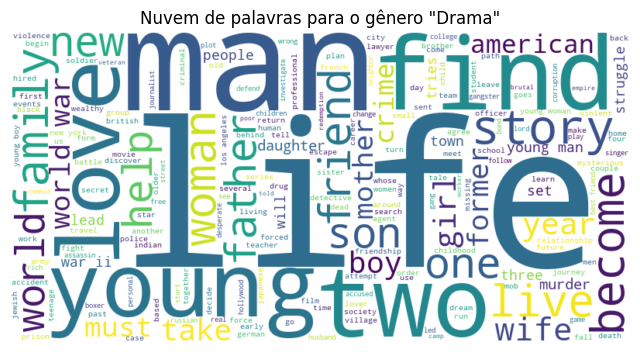

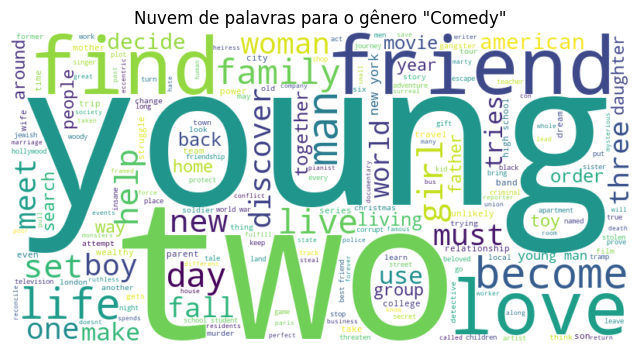

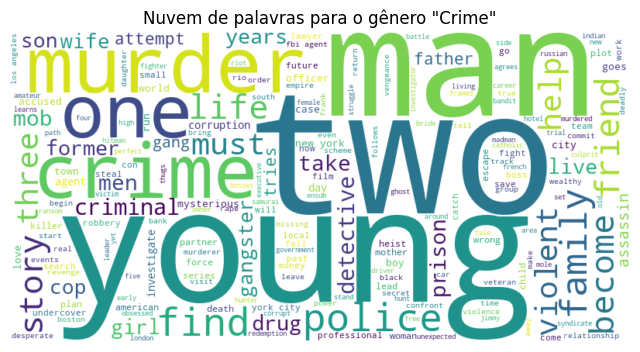

In [36]:
# explode múltiplos gêneros por filme
df_exploded = df_imdb.assign(genre=df_imdb['genre'].str.split(', ')).explode('genre')
# três gêneros com mais filmes
genre_counts = df_exploded['genre'].value_counts()
top_genres = genre_counts.head(3).index.tolist()
# nuvem de palavras para cada um dos três gêneros mais frequentes
for genre in top_genres:
    filtered_overviews = ' '.join(df_imdb[df_imdb['genre'].str.contains(genre, na=False)]['overview'])
    filtered_overviews_clean = re.sub(r'[^\w\s]', '', filtered_overviews).lower()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_overviews_clean)
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de palavras para o gênero "{genre}"')
    plt.show()


*As nuvens de palavras geradas a partir das sinopses fornecem uma representação visual das palavras mais frequentes em cada gênero. Embora sejam úteis para destacar temas principais e palavras-chave, elas podem não ser completamente precisas na inferência direta de gênero, pois não capturam toda a complexidade contextual e semântica necessária para identificar gêneros cinematográficos específicos.*

*No entanto, quando combinadas com outras técnicas de Processamento de Linguagem Natural (NLP), como modelagem de tópicos ou classificação de texto, as nuvens de palavras podem ajudar a formar uma visão inicial dos temas predominantes e estilos narrativos presentes nos filmes. É importante ressaltar que, embora a sinopse forneça uma visão geral do enredo e tema do filme, ela pode não capturar todos os elementos necessários para identificar com precisão o gênero cinematográfico específico.*

#### **Modelagem**

##### 3.	Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê?

*Para prever a nota do IMDb a partir dos dados, usarei modelos de regressão. O processo envolve dividir os dados em conjunto de treino e teste, além de avaliar a performance dos modelos utilizando métricas recomendadas pela literatura.*

*As variáveis que irei usar são: 'released_year', 'certificate' (após transformação em variáveis dummy), 'runtime', 'genre' (após transformação em variáveis dummy), 'meta_score', 'no_of_votes' e 'gross'. Na etapa anterior, denominada 'Pré-processamento, transformação e análise exploratória da base de dados', foram realizadas transformações necessárias para preparar os dados para modelagem. Por exemplo, a variável 'runtime', inicialmente do tipo objeto, foi convertida para um formato numérico adequado. Além disso, ajustes foram feitos em 'gross', 'released_year', 'meta_score' e 'no_of_votes', incluindo tratamento de valores ausentes e normalização quando aplicável.*

##### Qual tipo de problema estamos resolvendo (regressão, classificação)? 

*Um problema de regressão. Isso porque tenta-se prever uma variável contínua, que é o IMDb Rating dos filmes.*

##### Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

In [37]:
# função para pré-processar os dados
def preprocess_data(df_imdb):
    df_copy = df_imdb.copy()
    #  explode para separar as combinações de gêneros
    df_imdb_exploded = df_copy.assign(genre=df_copy['genre'].str.split(', ')).explode('genre')
    # categóricas em variáveis dummy (one-hot encoding)
    df_final = pd.get_dummies(df_imdb_exploded, columns=['certificate', 'genre'])
    # removendo colunas que ainda são objetos 
    non_numeric_columns = df_final.select_dtypes(include=['object']).columns
    df_final = df_final.drop(columns=non_numeric_columns)
    # remover caracteres especiais
    df_final.columns = df_final.columns.str.replace(r'\W+', '_', regex=True)
    # as features (X) e o target (y)
    X = df_final.drop(columns=['imdb_rating'])
    y = df_final['imdb_rating']
    return X, y
# features (X) e targets (y)
X, y = preprocess_data(df_imdb)

# modelos
models = [
    ('LightGBM', LGBMRegressor(verbosity=0)),
    ('CatBoost', CatBoostRegressor(verbose=False)),
    ('Random Forest', RandomForestRegressor()),
    ('XGBoost', XGBRegressor())
]

# treina e avalia os modelos
print("Resultados da Avaliação dos Modelos:")
for model_name, model in models:
    # conjunto de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # treinar o modelo
    model.fit(X_train, y_train)
    # predição
    y_pred = model.predict(X_test)
    # calculando as métricas e printando
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"Modelo: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    print("\n")

for model_name, model in models:
    model.fit(X, y) 
    filename = os.path.join('models', f'{model_name}_model.pkl')
    joblib.dump(model, filename)
    print(f"Modelo {model_name} salvo como {filename}")

Resultados da Avaliação dos Modelos:
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
Modelo: LightGBM
Mean Squared Error (MSE): 0.009561599903588595
Mean Absolute Error (MAE): 0.07442153159220645
Root Mean Squared Error (RMSE): 0.0977834336868398
R-squared (R²): 0.852854514538919


Modelo: CatBoost
Mean Squared Error (MSE): 0.008851542082031748
Mean Absolute Error (MAE): 0.07241322561910087
Root Mean Squared Error (RMSE): 0.09408263432765766
R-squared (R²): 0.8637817447003908


Modelo: Random Forest
Mean Squared Error (MSE): 0.006085007874015769
Mean Absolute Error (MAE): 0.053751968503937785
Root Mean Squared Error (RMSE): 0.07800646046332169
R-squared (R²): 0.9063565254052826


Modelo: XGBoost
Mean Squared Error (MSE): 0.004552824578334176
Mean Absolute Error (MAE): 0.04416345235869639
Root Mean Squared Error (RMSE): 0.06747462173539157
R-squared (R²): 0.92993561856246

***XGBoost*** *apresenta a melhor performance entre os modelos avaliados, com as seguintes métricas:*

*MSE: 0.00455*

*MAE: 0.04416*

*RMSE: 0.06747*

*R² (R-squared): 0.92994*

*Prós:*

*-Excelente desempenho com um R² de 0.92994, indicando uma explicação robusta da variabilidade dos dados.*

*-Eficiência computacional, sendo rápido para treinar e prever.*

*-Boa resistência ao overfitting, especialmente com ajustes adequados de hiperparâmetros.*

*Contras:*

*-Pode exigir ajustes de hiperparâmetros para alcançar a otimização máxima.*

*-Menos interpretável do que modelos mais simples como regressão linear.*

*No contexto específico da previsão da nota do IMDb, o R² é frequentemente usado para avaliar a adequação do modelo em explicar as variações nas classificações dos filmes. No entanto, para uma avaliação completa, é útil considerar todas as métricas mencionadas, especialmente porque cada uma oferece insights diferentes sobre a qualidade das previsões do modelo.*

##### 4.	Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',

 'Released_Year': '1994',

 'Certificate': 'A',

 'Runtime': '142 min',

 'Genre': 'Drama',

 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',

 'Meta_score': 80.0,

 'Director': 'Frank Darabont',

 'Star1': 'Tim Robbins',

 'Star2': 'Morgan Freeman',

 'Star3': 'Bob Gunton',

 'Star4': 'William Sadler',

 'No_of_Votes': 2343110,
 
 'Gross': '28,341,469'}


Qual seria a nota do IMDB?



In [38]:
# modelo treinado
with open("models\XGBoost_model.pkl", "rb") as arquivo:
    model = joblib.load(arquivo)
# dados de previsão
data = {
    'Series_Title': 'The Shawshank Redemption', 
    'Released_Year': '1994', 
    'Certificate': 'A', 
    'Runtime': '142 min', 
    'Genre': 'Drama', 
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.', 
    'Meta_score': 80.0, 
    'Director': 'Frank Darabont', 
    'Star1': 'Tim Robbins', 
    'Star2': 'Morgan Freeman', 
    'Star3': 'Bob Gunton', 
    'Star4': 'William Sadler', 
    'No_of_Votes': 2343110, 
    'Gross': '28,341,469'
}
# Gross para float
data['Gross'] = float(data['Gross'].replace(',', ''))
df_previsao = pd.DataFrame([data])
# pré-processamento para previsão
def preprocess_predict(df_previsao):
    df_copy = df_previsao.copy()
    # Released_Year para int
    df_copy['Released_Year'] = df_copy['Released_Year'].astype(int)
    # Ttransformção das variáveis categóricas
    df_copy = pd.get_dummies(df_copy, columns=['Certificate', 'Genre'])
    df_copy.columns = df_copy.columns.str.replace(r'\W+', '_', regex=True)
    X_predict = df_copy.drop(columns=['Series_Title', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Overview'])
    
    # verifica e adicionar colunas ausentes se necessário
    missing_cols = set(X.columns) - set(X_predict.columns)
    for col in missing_cols:
        X_predict[col] = 0
    X_predict = X_predict[X.columns]
    return X_predict

# pré-processamento para os dados de previsão
X_predict = preprocess_predict(df_previsao)
# previsão
previsao = model.predict(X_predict)
print("Dados de Previsão:")
display(df_previsao)
print('A nota de IMDb prevista para o filme sugerido, The Shawshank Redemption, é de:', f"{previsao.item():.2f}")


Dados de Previsão:


,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0


A nota de IMDb prevista para o filme sugerido, The Shawshank Redemption, é de: 8.15


##### Qual filme desenvolver a seguir?

*Com base na análise detalhada dos dados do IMDb e nos insights que obtive, sugeriro algumas estratégias para o próximo filme a ser desenvolvido. Recomendo focar em um filme que combine sucesso crítico e financeiro. Uma boa abordagem seria explorar um Drama ou Romance com uma narrativa poderosa e bem estruturada, aproveitando para destacar talentos reconhecidos na direção e no elenco. Outra opção seria apostar em um Adventure, Sci-Fi ou Action com um conceito inovador e visualmente impactante, alinhado com as tendências atuais do mercado e as preferências do nosso público. Portanto, o próximo filme deve equilibrar qualidade artística, apelo comercial e estratégias de distribuição para maximizar suas chances de sucesso tanto em termos de crítica quanto de retorno financeiro.*